# Grocery Stroe Sales Analysis
## Objectives



In [66]:
import pandas as pd
import numpy as nmp

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [209]:
transactions =  pd.read_parquet("../data/grocery-transactions.parquet")
demographics = pd.read_csv("../data/hh_demographics.csv")
products = pd.read_csv("../data/products.csv")

In [210]:
display(transactions.head(), products.head(), demographics.head())

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,week_no,coupon_disc,coupon_match_disc
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0


,product_id,manufacturer,department,brand,commodity_desc,sub_commodity_desc,curr_size_of_product
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,household_key
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16


In [211]:
transactions.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 2141908 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   basket_id          int64  
 2   day                int64  
 3   product_id         int64  
 4   quantity           int64  
 5   sales_value        float64
 6   store_id           int64  
 7   retail_disc        float64
 8   week_no            int64  
 9   coupon_disc        float64
 10  coupon_match_disc  float64
dtypes: float64(4), int64(7)
memory usage: 196.1 MB


In [212]:
transactions.notna().sum()

household_key        2141908
basket_id            2141908
day                  2141908
product_id           2141908
quantity             2141908
sales_value          2141908
store_id             2141908
retail_disc          2141908
week_no              2141908
coupon_disc          2141908
coupon_match_disc    2141908
dtype: int64

In [213]:
demographics.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age_desc             801 non-null    object
 1   marital_status_code  801 non-null    object
 2   income_desc          801 non-null    object
 3   homeowner_desc       801 non-null    object
 4   hh_comp_desc         801 non-null    object
 5   household_size_desc  801 non-null    object
 6   kid_category_desc    801 non-null    object
 7   household_key        801 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 308.9 KB


In [214]:
products.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92353 entries, 0 to 92352
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   product_id            92353 non-null  int64 
 1   manufacturer          92353 non-null  int64 
 2   department            92353 non-null  object
 3   brand                 92353 non-null  object
 4   commodity_desc        92353 non-null  object
 5   sub_commodity_desc    92353 non-null  object
 6   curr_size_of_product  92353 non-null  object
dtypes: int64(2), object(5)
memory usage: 27.6 MB


In [215]:
transactions.describe().round(2)

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,week_no,coupon_disc,coupon_match_disc
count,2141908.00,2.141908e+06,2141908.00,2141908.00,2141908.00,2141908.00,2141908.00,2141908.00,2141908.00,2141908.00,2141908.00
mean,1056.30,3.404645e+10,389.39,2880586.03,99.09,3.09,3265.97,-0.53,56.31,-0.02,-0.00
std,605.63,4.723623e+09,190.07,3828071.80,1138.13,4.14,9118.83,1.23,27.15,0.21,0.04
min,1.00,2.698490e+10,1.00,25671.00,0.00,0.00,1.00,-130.02,1.00,-55.93,-7.70
25%,547.00,3.040791e+10,229.00,917008.00,1.00,1.29,330.00,-0.68,33.00,0.00,0.00
50%,1045.00,3.281164e+10,392.00,1027835.00,1.00,2.00,372.00,0.00,57.00,0.00,0.00
75%,1583.00,4.012798e+10,555.00,1132770.00,1.00,3.49,422.00,0.00,80.00,0.00,0.00
max,2099.00,4.230536e+10,711.00,18316298.00,89638.00,840.00,34280.00,3.99,102.00,0.00,0.00


In [216]:
demographics.describe(include=[float, int, object]).round(2)

,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,household_key
count,801,801,801,801,801,801,801,801.00
unique,6,3,12,5,6,5,4,NaN
top,45-54,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,NaN
freq,288,344,192,504,255,318,558,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1235.18
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,736.80
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,596.00
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1218.00
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1914.00


In [217]:
products.describe(include=[float, int, object]).round(2)

,product_id,manufacturer,department,brand,commodity_desc,sub_commodity_desc,curr_size_of_product
count,92353.00,92353.00,92353,92353,92353,92353,92353
unique,NaN,NaN,44,2,308,2383,4345
top,NaN,NaN,GROCERY,National,GREETING CARDS/WRAP/PARTY SPLY,CARDS EVERYDAY,
freq,NaN,NaN,39021,78537,2785,1005,30607
mean,5328352.84,1739.23,NaN,NaN,NaN,NaN,NaN
std,5359937.08,1818.27,NaN,NaN,NaN,NaN,NaN
min,25671.00,1.00,NaN,NaN,NaN,NaN,NaN
25%,970628.00,328.00,NaN,NaN,NaN,NaN,NaN
50%,1621091.00,1094.00,NaN,NaN,NaN,NaN,NaN
75%,9704770.00,2264.00,NaN,NaN,NaN,NaN,NaN


#### Decreasing the size of the dataset

In [218]:
transactions = transactions.astype({"household_key":"int16",
                                    "day": "int8",
                                    "quantity": "int32",
                                    "store_id": "int32",
                                    "week_no": "int8",
                                    "sales_value":"float32",
                                    "retail_disc":"float",
                                    "coupon_disc":"float"})
transactions.info()
                          

<class 'pandas.core.frame.DataFrame'>
Index: 2141908 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int16  
 1   basket_id          int64  
 2   day                int8   
 3   product_id         int64  
 4   quantity           int32  
 5   sales_value        float32
 6   store_id           int32  
 7   retail_disc        float64
 8   week_no            int8   
 9   coupon_disc        float64
 10  coupon_match_disc  float64
dtypes: float32(1), float64(3), int16(1), int32(2), int64(2), int8(2)
memory usage: 130.7 MB


## Data Cleaning and Preparation

In this section, I:

Convert the "retail_disc" and "coupon_disc" columns into positive values.

Add two columns:

* A column that captures the `total_discount` by row (sum of `retail_disc`, `coupon_disc`)
* The percentage disount (`total_discount` / `sales_value`). Make sure this is positive (try `.abs()`).
* If the percentage discount is greater than 1, set it equal to 1. If it is less than 0, set it to 0.

Drop the individual discount columns (`retail_disc`, `coupon_disc`, `coupon_match_disc`).


In [219]:
transactions[["retail_disc","coupon_disc"]] = transactions[["retail_disc","coupon_disc"]].abs()

In [220]:
# create a discount sum column and a percentage discount column and drop ["retail_disc", "coupon_disc", "coupon_match_disc"] columns
transactions = (
    transactions
    .assign(total_discount = transactions["retail_disc"] + transactions["coupon_disc"],
            percentage_discount = (lambda x: (x["total_discount"] / x["sales_value"])))
).drop(["retail_disc", "coupon_disc", "coupon_match_disc"], axis=1)


In [221]:
# Use where to cap values above 1 at 1 and below 0 at 0. Other methods could be used here as well.
transactions["percentage_discount"] = (transactions["percentage_discount"]
                                       .where(transactions["percentage_discount"] < 1, 1.0)
                                       .where(transactions["percentage_discount"] > 0, 0)
                                      )
transactions["percentage_discount"] = transactions["percentage_discount"].round(4)
transactions.head()

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,week_no,total_discount,percentage_discount
0,1364,26984896261,1,842930,1,2.19,31742,1,0.00,0.0000
1,1364,26984896261,1,897044,1,2.99,31742,1,0.40,0.1338
2,1364,26984896261,1,920955,1,3.09,31742,1,0.00,0.0000
3,1364,26984896261,1,937406,1,2.50,31742,1,0.99,0.3960
4,1364,26984896261,1,981760,1,0.60,31742,1,0.79,1.0000


In [222]:
transactions["percentage_discount"].describe()

count    2.141908e+06
mean     2.075549e-01
std      2.911754e-01
min      0.000000e+00
25%      0.000000e+00
50%      3.370000e-02
75%      3.328000e-01
max      1.000000e+00
Name: percentage_discount, dtype: float64

## Overall Statistics
### Objectives:
* Understanding the dataset scope in terms of transactions size, customer base, and product variety.
* Summarizing key metrics such as Total Sales, Total Discounts, and Household Engagement.
* Identifing patterns and anomalies in the  distribution shapes and outliers.
* Provide a foundation for optimizing pricing, promotions, and customer engagement to support strategic decisions.


 #### Total Transactions
 Helps estimate the dataset's size and activity levels.

In [223]:
# calculate the total number of the transactions
print("Number of transactions: {:,}".format(len(transactions)))

Number of transactions: 2,141,908


####  Total Active Households
Indicates customer engagement

In [224]:
# Calculate unique households in dataset with nunique (describe could also be used)

print("Number of active customers: {:,}".format(transactions["household_key"].nunique()))


Number of active customers: 2,098


#### Total Active Products
Indicates product variety

In [225]:
# Calculate unique product_ids in dataset with nunique

print("Number of active products: {:,}".format(transactions["product_id"].nunique()))

Number of active products: 84,014


#### Average Sales
Useful for benchmarking individual transactions against the overall average.

In [226]:
print("Average Sales: {:,.2f}".format(transactions["sales_value"].mean()))

Average Sales: 3.09


#### Overall Percent Discount
Indicates the significance of discounts in sales strategy. A high discount percentage might suggest aggressive pricing strategies or promotional campaigns.

In [227]:
print("Percent Discount: {:,.2f}%".format((transactions['total_discount'].sum() / transactions['sales_value'].sum())*100))


Percent Discount: 17.75%


#### Average Basket Value
Indicates how much customers spend per shopping trip

In [228]:

print("Average Sales Value per Basket: {:,.2f}".format(transactions['sales_value'].sum() / transactions['basket_id'].nunique()))

Average Sales Value per Basket: 28.53


#### Average Household Spend
Reveals household-level engagement and overall contribution to sales.

In [229]:
print("Average Sales Value per Household: {:,.2f}".format(transactions['sales_value'].sum() / transactions['household_key'].nunique()))


Average Sales Value per Household: 3,159.16


#### Sales' Statistics & Distribution
Helps assess the dataset's financial significance and highlights the range, central tendency, and variability of sales values. High variance might suggest diverse spending habits or product pricing.

Total Sales: 6,627,924.0


Sales' Statistics
count    2.141908e+06
mean     3.094402e+00
std      4.130737e+00
min      0.000000e+00
25%      1.290000e+00
50%      2.000000e+00
75%      3.490000e+00
max      8.400000e+02
Name: sales_value, dtype: float64


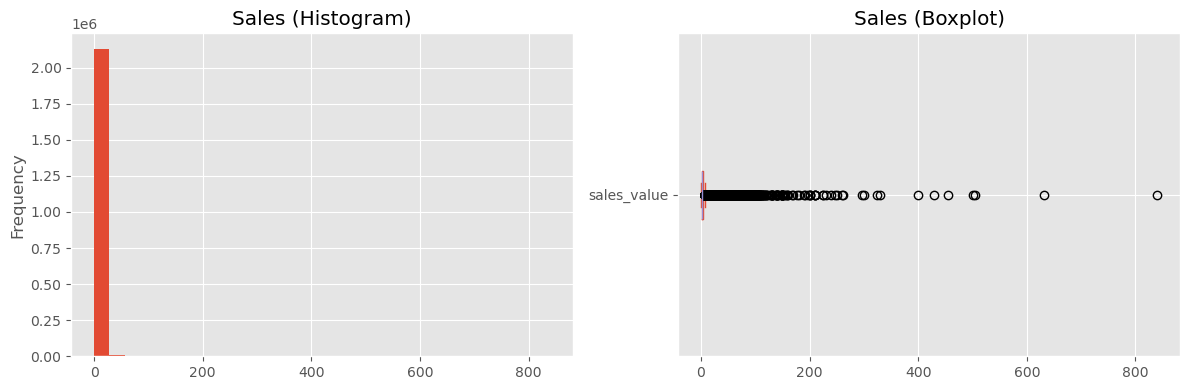

In [230]:
print(f"Total Sales: {transactions['sales_value'].sum():,}") # print total sales
print("\n")
print("Sales' Statistics")
print(transactions['sales_value'].describe()) # print sales statistics
# plot the sales_value distribution in box-plot
fig, axs = plt.subplots(1, 2, figsize=(12, 4)) 

transactions['sales_value'].plot.hist(ax=axs[0], title="Sales (Histogram)", bins=30)

transactions['sales_value'].plot.box(ax=axs[1], vert=False, title="Sales (Boxplot)")

plt.tight_layout() 
plt.show()

#### Quantity's Statistics & Distirbution
Provides an overall measure of the volume of goods sold and can indicate the scale of business operations, shows the variability and helps identify outliers or patterns in purchasing behavior.

Total Quantity: 212,233,694


Quantity's Statistics
count    2.141908e+06
mean     9.908628e+01
std      1.138132e+03
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      8.963800e+04
Name: quantity, dtype: float64


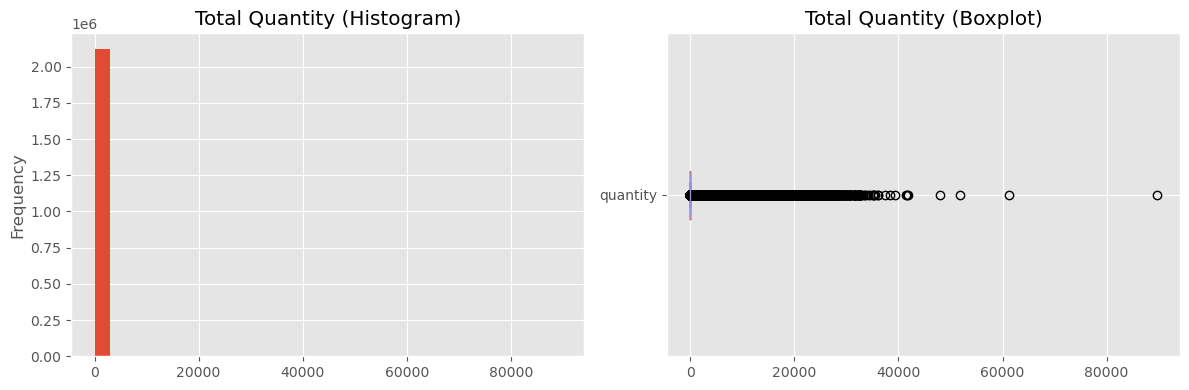

In [231]:
print(f"Total Quantity: {transactions['quantity'].sum():,}")
print("\n")
print("Quantity's Statistics")
print(transactions['quantity'].describe())

fig, axs = plt.subplots(1, 2, figsize=(12, 4)) 

transactions['quantity'].plot.hist(ax=axs[0], title="Total Quantity (Histogram)", bins=30)

transactions['quantity'].plot.box(ax=axs[1], vert=False, title="Total Quantity (Boxplot)")

plt.tight_layout() 
plt.show()


#### Discount's Statistics & Distribution
Helpful for evaluating promotional expenses and understanding typical discount sizes. It also highlights how consistent discounting is and whether there are significant deviations. The distribution identifies common discount ranges and potential outliers that might need further analysis.

Total Discount: 1,176,459.0


Discount's Statistics
count    2.141908e+06
mean     5.492576e-01
std      1.257951e+00
min      0.000000e+00
25%      0.000000e+00
50%      5.000000e-02
75%      6.900000e-01
max      1.300200e+02
Name: total_discount, dtype: float64


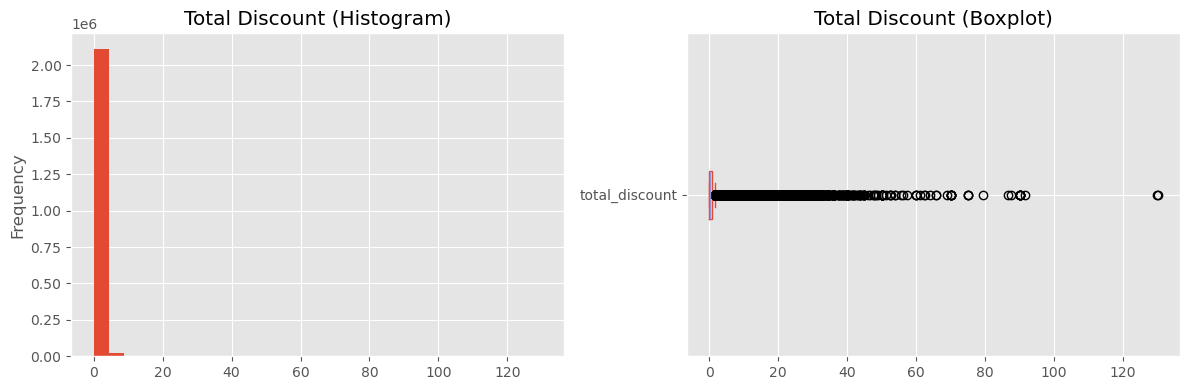

In [232]:
print(f"Total Discount: {transactions['total_discount'].sum().round():,}") # Total Discount
print("\n")
print("Discount's Statistics")
print(transactions['total_discount'].describe())

fig, axs = plt.subplots(1, 2, figsize=(12, 4)) 

transactions['total_discount'].plot.hist(ax=axs[0], title="Total Discount (Histogram)", bins=30)

transactions['total_discount'].plot.box(ax=axs[1], vert=False, title="Total Discount (Boxplot)")

plt.tight_layout() 
plt.show()

The value shows steep discount, because this is a discount retailer... so, it is not too suprising!

#### Discount Percentage Statistics & Distribution

Discount Percentage's Statistics
count    2.141908e+06
mean     2.075549e-01
std      2.911754e-01
min      0.000000e+00
25%      0.000000e+00
50%      3.370000e-02
75%      3.328000e-01
max      1.000000e+00
Name: percentage_discount, dtype: float64


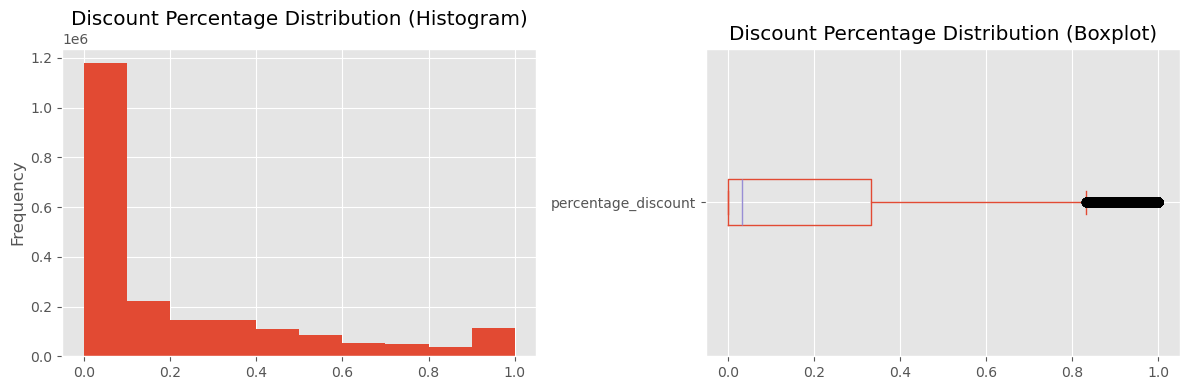

In [233]:
print("Discount Percentage's Statistics")
print(transactions['percentage_discount'].describe())

fig, axs = plt.subplots(1, 2, figsize=(12, 4)) 

transactions['percentage_discount'].plot.hist(ax=axs[0], title="Discount Percentage Distribution (Histogram)")

transactions['percentage_discount'].plot.box(ax=axs[1], vert=False, title="Discount Percentage Distribution (Boxplot)")

plt.tight_layout() 
plt.show()

Findings:

The majority of the item comes with less than 20% discount


## Household Analysis

### Objective:

Understand customer purchasing patterns, average spending, and response to discounts. Identify loyal customers, high spenders, and discount-sensitive segments.

#### Calculating Total and Average Spend per Household

In [295]:
household_spending = (transactions.groupby("household_key")
                      .agg(total_orders = ('basket_id','nunique'),
                           total_spend = ("sales_value","sum"),
                           total_discount = ("total_discount","sum"),
                           )
                      .reset_index()
                     )

household_spending = household_spending.assign(
                            avg_order_spend = (household_spending['total_spend']/household_spending['total_orders']).round(2),
                            avg_order_discount = (household_spending['total_discount']/household_spending['total_orders']).round(2),
                            )

household_spending = household_spending.sort_values(by='total_spend', ascending=False)

household_spending.to_csv("../results/household_spending.csv", index=False) # saved for further analysis

household_spending

,household_key,total_orders,total_spend,total_discount,avg_order_spend,avg_order_discount
1607,1609,412,27859.679688,2509.68,67.62,6.09
1451,1453,761,21661.289062,2880.00,28.46,3.78
1428,1430,344,20352.990234,2491.62,59.17,7.24
717,718,599,19299.859375,4131.39,32.22,6.90
706,707,498,19194.419922,2193.94,38.54,4.41
...,...,...,...,...,...,...
10,11,5,33.389999,10.98,6.68,2.20
521,522,3,29.340000,0.29,9.78,0.10
688,689,3,28.959999,3.84,9.65,1.28
1895,1897,1,19.580000,0.98,19.58,0.98


#### Household Segmentation by Spending 

In [249]:
# Spending Segmentation
household_spending['spending_category'] = pd.qcut(household_spending['total_spend'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

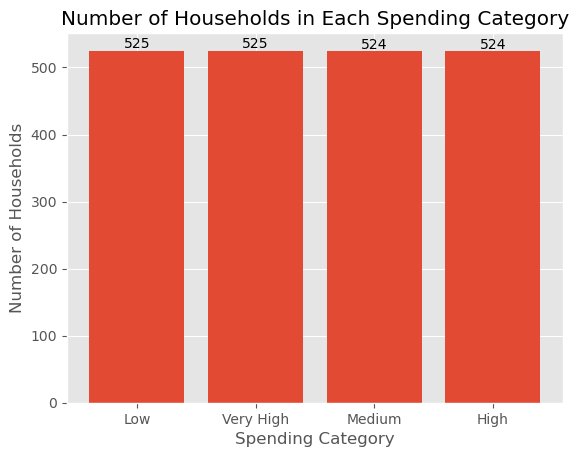

In [260]:
# count each spending_category
category_counts = household_spending['spending_category'].value_counts()

# Create a figure and axis
fig, ax = plt.subplots()

# Create a bar chart
bars = ax.bar(category_counts.index, category_counts.values)

# Set the title and labels
ax.set_title('Number of Households in Each Spending Category')
ax.set_xlabel('Spending Category')
ax.set_ylabel('Number of Households')

# Add numbers at the top of each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), 
            ha='center', va='bottom')

# Show the plot
plt.show()

### Insights from the Graph:
1. **Uniform Distribution**: The number of households in each spending category (`Low`, `Very High`, `Medium`, `High`) is almost evenly distributed, with only minor differences in counts.
2. **Equal High Counts**: Both `Low` and `Very High` spending categories have the highest counts at 525 households each, suggesting that a significant portion of households either spend very little or spend a lot.
3. **Balanced Spending Categories**: The slight difference between `Medium` and `High` categories, both around 524 households, indicates a balanced distribution of spending habits.

### Recommendations for Business Decision-Making:
1. **Targeted Marketing**:
   - **Low Spending Households**: Develop marketing strategies to encourage higher spending, such as promotions or discounts on frequently purchased items.
   - **Very High Spending Households**: Introduce loyalty programs or premium services to retain these high-value customers and encourage continued spending.
   
2. **Product Offerings**:
   - **Diversify Products**: Ensure a wide range of products is available to cater to the different spending habits. For `Low` spenders, focus on value-for-money options. For `Very High` spenders, consider introducing exclusive or premium products.
   
3. **Customer Segmentation**:
   - **Personalized Engagement**: Use customer segmentation to tailor communication and offers based on spending categories. Personalized messages can improve engagement and sales.

4. **Incentivize Middle Categories**:
   - For households in `Medium` and `High` categories, consider incentives to shift them into the `Very High` category, such as bundle offers or cashback on higher spend thresholds.

5. **Retention Programs**:
   - Implement retention strategies across all categories to maintain the customer base. For `Low` spenders, focus on engagement strategies to increase brand loyalty, while for `High` and `Very High`, emphasize exclusive benefits.



#### Order Frequency Analysis

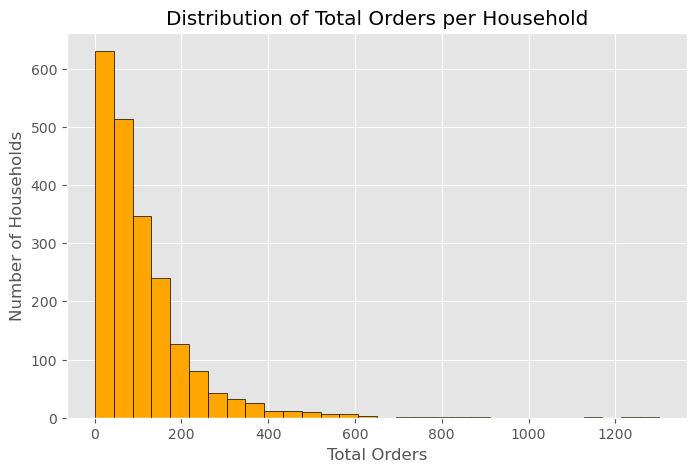

In [266]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the histogram
ax.hist(household_spending['total_orders'], bins=30, color='orange', edgecolor='black')

# Set the title and labels
ax.set_title('Distribution of Total Orders per Household')
ax.set_xlabel('Total Orders')
ax.set_ylabel('Number of Households')

# Show the plot
plt.show()


### Insights from the Graph:
1. **Right-Skewed Distribution**: The histogram shows a right-skewed distribution, indicating that most households have a relatively low number of total orders, with a small number of households placing a significantly higher number of orders.
2. **Majority with Low Orders**: A large number of households have fewer than 200 total orders, with the highest concentration around 0-50 orders.
3. **Long Tail**: There are a few households with very high total orders, extending up to over 1200 orders, suggesting a minority of highly frequent buyers.

### Recommendations for Business Decision-Making:
1. **Target Low-Order Households**:
   - **Engagement Campaigns**: Implement campaigns to encourage households with low total orders to increase their purchasing frequency. This could include personalized promotions, discounts on repeat purchases, or reminders for reordering commonly bought items.
   
2. **Retention of High-Order Households**:
   - **Loyalty Programs**: For households with high total orders, introduce or enhance loyalty programs to retain these valuable customers. Offer exclusive benefits, rewards, or personalized services to keep them engaged and loyal.
   
3. **Analyze High-Frequency Buyers**:
   - **Behavior Analysis**: Study the purchasing behavior of high-frequency buyers to identify patterns or preferences. Use these insights to develop targeted marketing strategies or product recommendations for other customers.
   
4. **Improve Order Experience**:
   - **Streamline Ordering**: Simplify the ordering process for households to encourage more frequent purchases. This could involve enhancing the user experience on digital platforms, offering one-click reordering, or optimizing delivery options.
   
5. **Segmented Marketing**:
   - **Personalized Offers**: Use the data to segment customers by order frequency and tailor marketing efforts accordingly. Low-order households could receive incentives to increase order frequency, while high-order households could be targeted with premium offers or early access to new products.



#### Discount Utilization

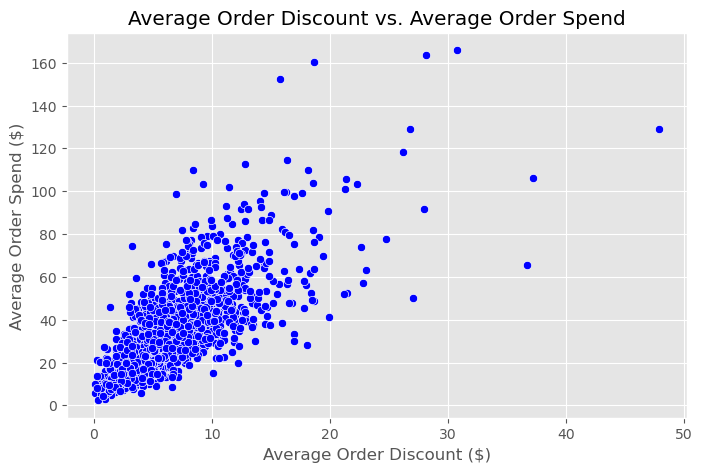

In [268]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the scatter plot using Seaborn with the ax parameter
sns.scatterplot(data=household_spending, x='avg_order_discount', y='avg_order_spend', color='blue', ax=ax)

# Set the title and labels
ax.set_title('Average Order Discount vs. Average Order Spend')
ax.set_xlabel('Average Order Discount ($)')
ax.set_ylabel('Average Order Spend ($)')

# Show the plot
plt.show()


### Insights from the Graph:
1. **Positive Correlation**: There is a general trend suggesting a positive correlation between average order discount and average order spend. As discounts increase, the average order spend tends to increase as well.
2. **Clustering at Lower Discounts**: Most of the data points are clustered at lower average discounts (0 to 10 dollars), with corresponding average order spends generally under 60 dollars.
3. **Outliers**: There are a few outliers with high average order discounts (above 20 dollars) and high average order spends, indicating that for some households, significant discounts lead to substantially higher spending.

### Recommendations for Business Decision-Making:
1. **Optimize Discount Strategies**:
   - **Moderate Discounts**: Since most households cluster at lower discount levels, consider offering moderate discounts to encourage higher spending without significantly eroding margins.
   
2. **Targeted Promotions**:
   - **High-Spend Segments**: For households that respond well to higher discounts, targeted promotions could be deployed to maximize order values. This could be done through personalized offers based on past purchasing behavior.
   
3. **Balance Discount and Spend**:
   - **Avoid Excessive Discounting**: While higher discounts may increase spending, it is essential to analyze the profitability. Avoid excessive discounting that might erode profit margins unless it leads to a substantial increase in order volume or long-term customer value.
   
4. **Behavioral Segmentation**:
   - **Segment Analysis**: Further analyze customer segments that respond differently to discounts. This can help in tailoring discounts to specific customer groups, optimizing the effectiveness of promotional strategies.
   
5. **Encourage Higher Spending with Thresholds**:
   - **Discount Thresholds**: Implement discount thresholds where customers must spend a minimum amount to receive a discount. This strategy can encourage customers to increase their order size to qualify for a discount, thereby increasing overall revenue.

By leveraging these insights, businesses can fine-tune their discount strategies to encourage higher spending while maintaining profitability.


#### Average Order Value (AOV) Analysis

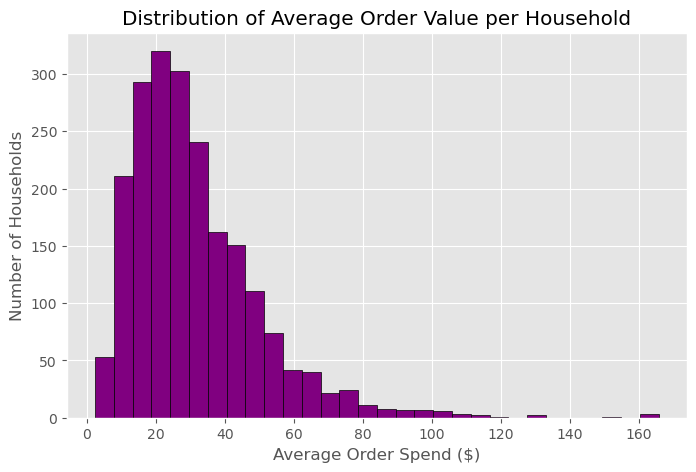

In [271]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the histogram on the axis
ax.hist(household_spending['avg_order_spend'], bins=30, color='purple', edgecolor='black')

# Set the title and labels
ax.set_title('Distribution of Average Order Value per Household')
ax.set_xlabel('Average Order Spend ($)')
ax.set_ylabel('Number of Households')

# Show the plot
plt.show()


### Insights from the Graph:
1. **Right-Skewed Distribution**: The distribution of average order spend per household is right-skewed, with the majority of households having an average order spend between $10 and $50. This indicates that most households tend to spend within this range per order.
2. **Few High-Spend Households**: There are fewer households with a high average order spend, with some outliers spending significantly more (above $100 per order). These could represent premium or high-value customers.
3. **Concentration Around Lower Values**: A large concentration of households has an average order spend around $20 to $30, suggesting this is the common spending range.

### Recommendations for Business Decision-Making :
1. **Identify Premium Customers**:
   - **High-Spend Segment**: Focus on identifying and understanding the characteristics of households with high average order spends. These customers might be more receptive to premium products, exclusive offers, or loyalty programs.
   
2. **Upselling and Cross-Selling Opportunities**:
   - **Increase Average Order Value**: For households in the mid-range of the distribution, consider strategies like upselling or cross-selling to encourage them to increase their average order spend. This could include bundle offers, discounts on larger orders, or personalized recommendations.
   
3. **Segmented Marketing Campaigns**:
   - **Targeted Promotions**: Use the distribution data to create segmented marketing campaigns. For example, offer discounts or special deals to low-spending households to encourage higher spending, while providing exclusive benefits or premium services to high-spending households.
   
4. **Product Pricing and Assortment**:
   - **Optimize Pricing**: Consider reviewing the pricing strategy to ensure it aligns with the spending behavior of the majority of households. Offering products in the $20-$50 range might align well with the observed spending pattern.
   
5. **Customer Retention Strategies**:
   - **Retention Programs**: Develop customer retention programs targeting both mid and high spenders to maintain and potentially increase their spending levels. Loyalty programs or rewards could be effective in achieving this.

By leveraging these insights, businesses can tailor their strategies to maximize revenue, enhance customer satisfaction, and build long-term customer relationships.


#### Top Households by Spending

In [296]:
top_10_households = household_spending[["household_key","total_spend"]].head(10).reset_index(drop=True)

top_10_households

,household_key,total_spend
0,1609,27859.679688
1,1453,21661.289062
2,1430,20352.990234
3,718,19299.859375
4,707,19194.419922
5,1653,19153.750000
6,1111,18894.720703
7,982,18790.339844
8,400,18494.140625
9,1229,18304.310547


<Axes: xlabel='household_key'>

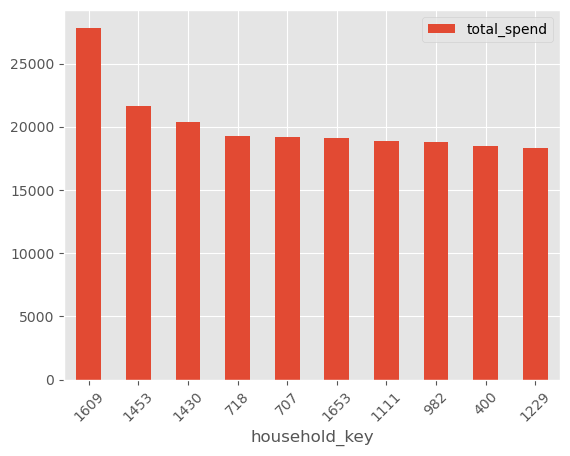

In [304]:
top_10_households.plot.bar(x="household_key",y="total_spend", rot=45)

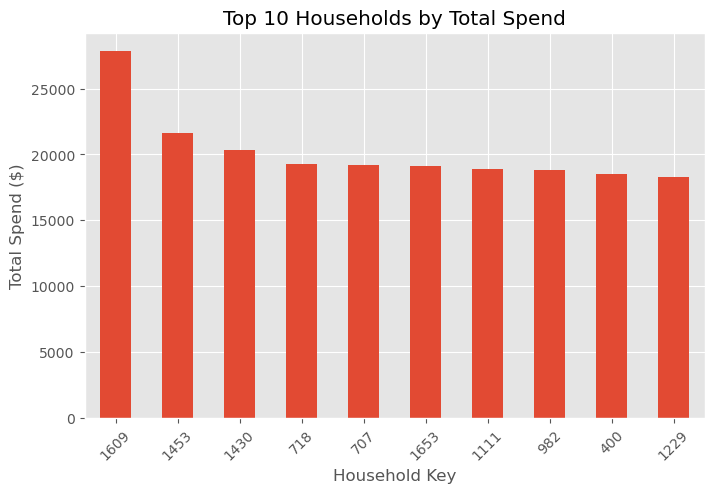

In [308]:
top_10_households = household_spending[["household_key","total_spend"]].head(10).reset_index(drop=True)


ax = top_10_households.plot.bar(x="household_key",y="total_spend", figsize=(, 4),rot=45, legend=False)

# Set the title and labels
ax.set_title('Top 10 Households by Total Spend')
ax.set_xlabel('Household Key')
ax.set_ylabel('Total Spend ($)')


# Show the plot
plt.show()


# DEMOGRAPHICS

* Read in the `hh_demographic.csv` file, but only the columns `AGE_DESC`, `INCOME_DESC`, `household_key`, and `HH_COMP_DESC`. Convert the appropriate columns to the category dtype.


* Then group the transactions table by household_id, and calculate the sum of SALES VALUE by household.


* Once you've done that, join the demographics DataFrame to the aggregated transactions table. Since we're interested in analyzing the demographic data we have, make sure not to include rows from transactions that don't match.


* Plot the sum of sales by age_desc and income_desc (in separate charts).


* Then, create a pivot table of the mean household sales by `AGE_DESC` and `HH_COMP_DESC`. Which of our demographics have the highest average sales?


In [309]:
demographics = pd.read_csv("../data/hh_demographics.csv")

In [312]:
households_demographics_spending = pd.merge(household_spending, demographics, on='household_key', how='inner')

households_demographics_spending.head()

,household_key,total_orders,total_spend,total_discount,avg_order_spend,avg_order_discount,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc
0,1609,412,27859.679688,2509.68,67.62,6.09,45-54,A,125-149K,Homeowner,2 Adults Kids,5+,3+
1,1453,761,21661.289062,2880.00,28.46,3.78,45-54,A,125-149K,Homeowner,2 Adults Kids,3,1
2,1430,344,20352.990234,2491.62,59.17,7.24,35-44,A,35-49K,Homeowner,2 Adults Kids,3,1
3,718,599,19299.859375,4131.39,32.22,6.90,45-54,A,25-34K,Homeowner,2 Adults Kids,5+,3+
4,707,498,19194.419922,2193.94,38.54,4.41,25-34,A,100-124K,Homeowner,2 Adults Kids,5+,3+


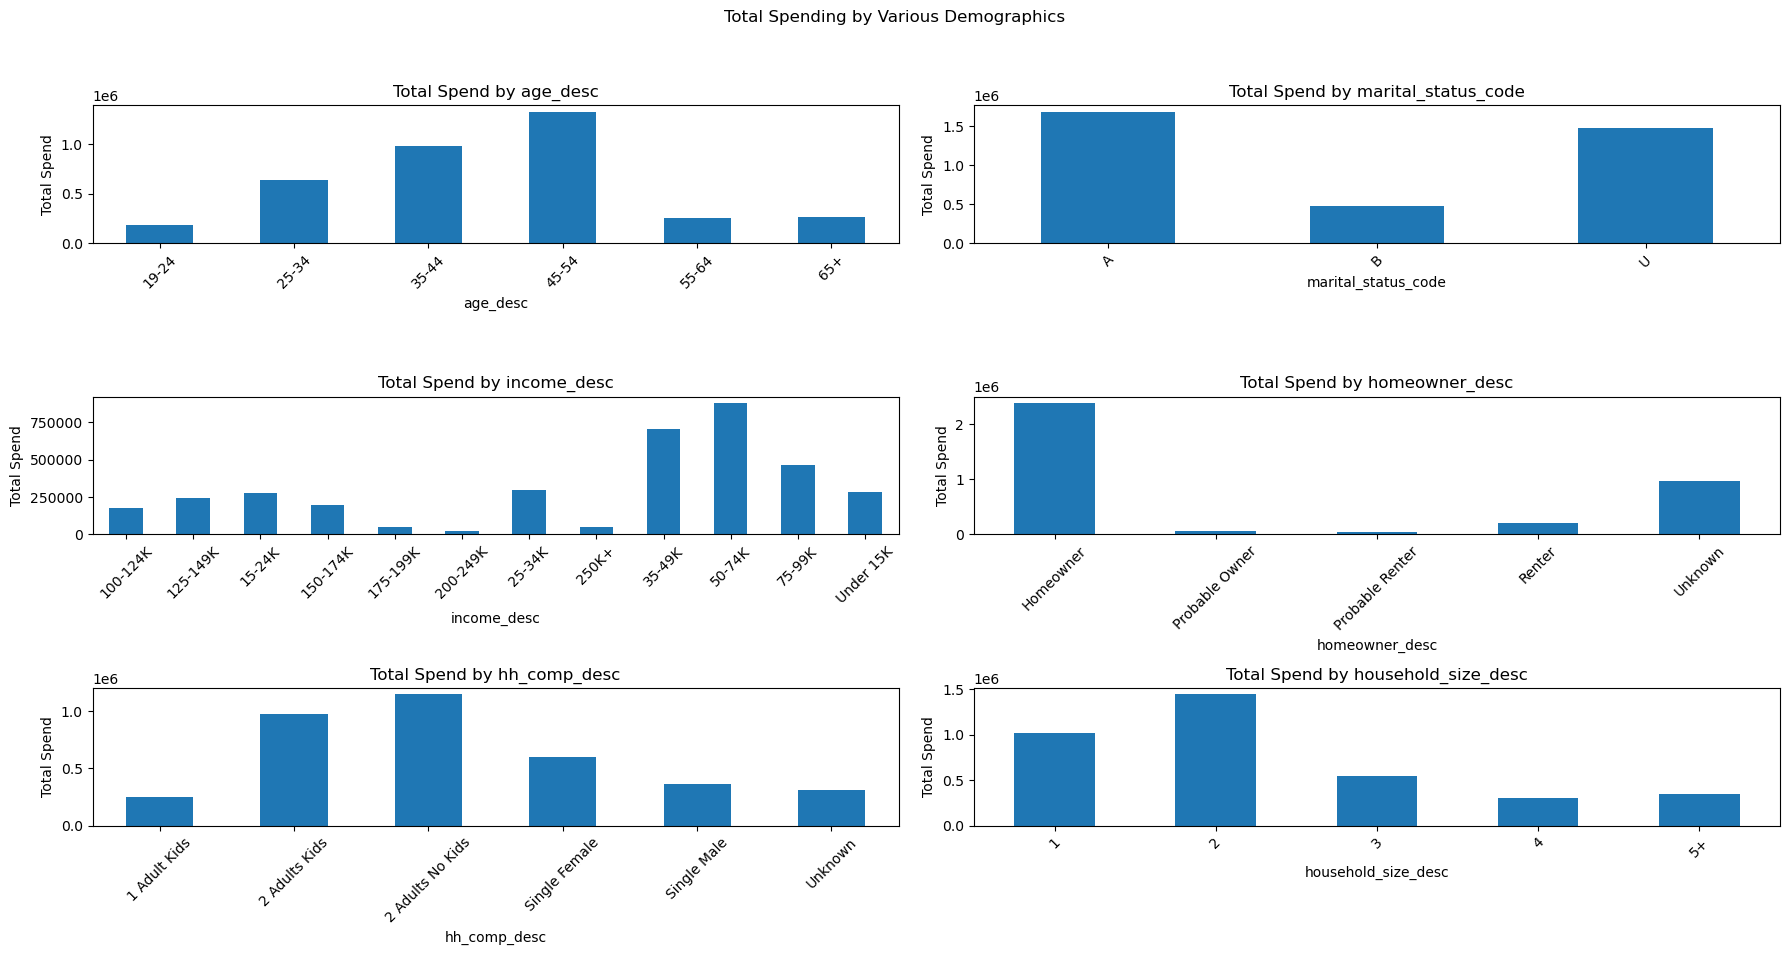

In [85]:
import matplotlib.pyplot as plt

# Define the figure and axes
fig, axs = plt.subplots(3, 2, figsize=(18, 10))
fig.suptitle('Total Spending by Various Demographics')

# List of columns to plot and corresponding axes
columns = ['age_desc', 'marital_status_code', 'income_desc', 'homeowner_desc', 'hh_comp_desc', 'household_size_desc']
axes = axs.flatten()

# Generate bar plots for each demographic feature
for i, col in enumerate(columns):
    households.groupby(col)['total_spend'].sum().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Total Spend by {col}')
    axes[i].set_ylabel('Total Spend')
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define a dictionary of column names and colors
columns_colors = {
    'age_desc':'black',
    'marital_status_code':'gray',
    'income_desc': 'blue',
    'homeowner_desc': 'brown',
    'hh_comp_desc': 'purple',
    'household_size_desc': 'orange'
}

# Plot each column in sequence
for column, color in columns_colors.items():
    plt.figure(figsize=(8, 6))
    bar_plot = sns.barplot(data=households, x=column, y='total_spend', estimator=np.sum, errorbar=('ci', False), color=color)
    
    # Add sum values above each bar with dollar sign and thousand separator
    for p in bar_plot.patches:
        height = p.get_height()
        bar_plot.annotate(f'${height:,.0f}', 
                          (p.get_x() + p.get_width() / 2., height), 
                          ha='center', va='bottom', fontsize=10, color='black')

    # Set plot title and labels
    plt.title(f'Total Spend by {column.replace("_", " ").title()}')
    plt.xlabel(column.replace("_", " ").title())
    plt.ylabel('Total Spend')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


NameError: name 'households' is not defined

<Figure size 800x600 with 0 Axes>

In [108]:
top_20_household = household_spending.head(20)
top_20_household

,household_key,total_spend,total_orders,avg_order_spend
1022,1023,38319.789062,603,63.55
1608,1609,27859.679688,412,67.62
1452,1453,21661.289062,761,28.46
1429,1430,20352.990234,344,59.17
717,718,19299.859375,599,32.22
706,707,19194.419922,498,38.54
1652,1653,19153.750000,541,35.40
1110,1111,18894.720703,321,58.86
981,982,18790.339844,412,45.61
399,400,18494.140625,310,59.66


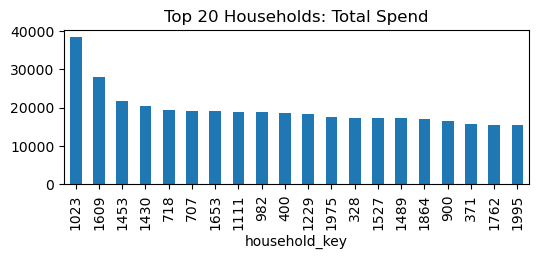

In [109]:
top_20_household.plot.bar(x = "household_key",
                          y = "total_spend", 
                          figsize=(6,2),
                          title = "Top 20 Households: Total Spend",
                          legend=False);

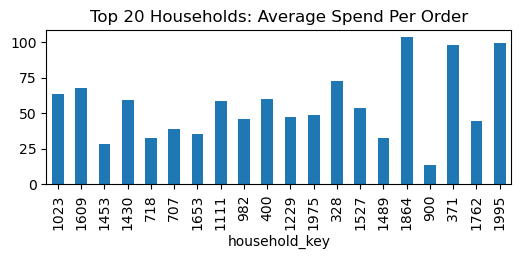

In [110]:
top_20_household.plot.bar(x = "household_key",
                          y = "avg_order_spend", 
                          figsize=(6,2),
                          title = "Top 20 Households: Average Spend Per Order",
                          legend=False);

##### Insight: 

Identify top-spending households and average spend, useful for targeting high-value customers.

##### Sales Distribution

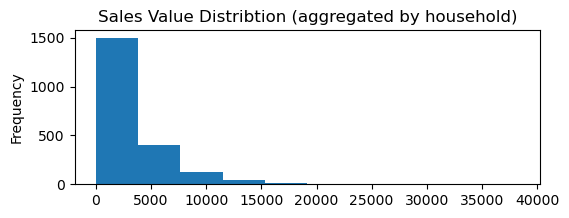

In [111]:
(transactions
 .groupby("household_key")
 .agg({'sales_value': 'sum'})
 .plot.hist(title="Sales Value Distribtion (aggregated by household)",legend=False,figsize=(6,2)));

#### Analyzing Discount Utilization by Household

In [45]:
household_discounts = transactions.groupby('household_key')['total_discount'].sum().reset_index()

household_discounts = household_discounts.sort_values(by='total_discount', ascending=False)

bottom_20_household_discounts = household_discounts.head(20)

top_20_household_discounts = household_discounts.tail(20)

display(top_20_household_discounts, bottom_20_household_discounts)

,household_key,total_discount
366,367,-2623.49
1630,1631,-2625.84
66,67,-2704.10
1761,1762,-2727.85
512,513,-2731.97
370,371,-2733.73
629,630,-2773.76
1336,1337,-2846.29
1452,1453,-2880.00
2084,2085,-2950.70


,household_key,total_discount
493,494,-0.25
521,522,-0.29
1896,1897,-0.98
656,657,-1.78
1385,1386,-1.95
1625,1626,-2.16
185,186,-3.78
688,689,-3.84
901,902,-5.32
1538,1539,-5.82


##### Insight: 

Determine households that benefit most from discounts, then conduct further study on the attributes of those households can inform discount strategies.

In [ ]:
# merge the household_spending with the hh_demographics and conduct hypothesis testing t_ets or oneway anova test

### To be Discused

In [78]:
# import matplotlib.pyplot as plt

# # Create figure and axis objects
# fig, ax1 = plt.subplots()

# # Plot the total_spend on the primary axis
# ax1.bar(top_20_household['household_key'], top_20_household['total_spend'], color='blue', alpha=0.6, label='Total Spend')
# ax1.set_xlabel('Household Key')
# ax1.set_ylabel('Total Spend', color='blue')
# # ax1.tick_params(axis='y', labelcolor='blue')

# # # Create a secondary axis
# # ax2 = ax1.twinx()
# # ax2.bar(top_20_household['household_key'], top_20_household['avg_spend'], color='red', alpha=0.3, label='Average Spend')
# # ax2.set_ylabel('Average Spend', color='red')
# # ax2.tick_params(axis='y', labelcolor='red')

# # Add a title and legend
# plt.title('Top 20 Households Spending: Total and Average Spend')
# ax1.legend(loc='upper left')
# ax2.legend(loc='upper right')

# # Show the plot
# plt.show()


## Product Analysis

* Which products had the most sales by sales_value? Plot  a horizontal bar chart.
* Did the top 10 selling items have a higher than average discount rate?
* What was the most common `product_id` among rows with the households in our top 10 households by sales value?
* Look up the names of the  top 10 products by sales in the `products.csv` dataset.
* Look up the product name of the item that had the highest quantity sold in a single row.

Checking to see which prodduct is associated the largest quantity

Findings:

The product id is 6534178, and it comes with 5% discount rate, which is nice as the retailer does not lose much for this high vlume product

In [38]:
# Use to grab row with max value - discount rate is lower than average

transactions.loc[transactions["quantity"].argmax()]

household_key          6.300000e+02
basket_id              3.474915e+10
day                   -9.000000e+00
product_id             6.534178e+06
quantity               8.963800e+04
sales_value            2.500000e+02
store_id               3.840000e+02
week_no                7.300000e+01
total_discount         1.345000e+01
percentage_discount    5.380000e-02
Name: 1442095, dtype: float64

<Axes: ylabel='Frequency'>

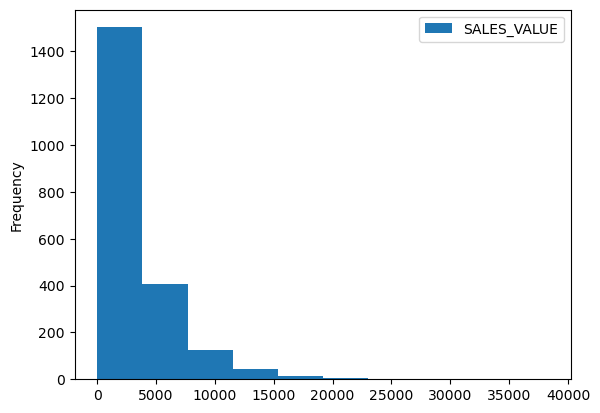

In [32]:
# plot distribution of households by total sales value
# First groupby household and calculate sum of sales
# then plot with a histogram

(transactions
 .groupby("household_key")
 .agg({'sales_value': 'sum'})
 .plot.hist())

# Final Project

Ok, so today we'll be working with the transactions, product, and hh_demographic tables in the project_data folder.

* First, read in the transactions data.

* Read in the only columns `household_key`, `basket_id`, `store_id`, `day`, `quantity`, and `sales_value`.

* Convert `day`, `quantity`, and `store_id` to the smallest appropriate integer types.


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Use the following snippet to create a Date Column.

transactions = (
    transactions
    .assign(date = (pd.to_datetime("2016", format='%Y') 
            + pd.to_timedelta(transactions["day"].sub(1).astype(str) + " days"))
           )
    .drop(["day"], axis=1)
)

## TIME BASED ANALYSIS

* Plot the sum of sales by month. Are sales growing over time?
* Next, plot the same series after filtering down to dates April 2016 and October 2017.
* Then, plot the sum of monthly sales in 2016 vs the monthly sales 2017.
* Finally, plot total sales by day of week.

# PRODUCT DEMOGRAPHICS

* Read in the product csv file.

* Only read in product_id and department from product (consider converting columns).

* Join the product DataFrame to transactions and demographics tables, performing an inner join when joining both tables.

* Finally, pivot the fully joined dataframe by AGE_DESC and DEPARTMENT, calculating the sum of sales. Which category does our youngest demographic perform well in?



# EXPORT

Finally, export your pivot table to an excel file. Make sure to provide a sheet name.